<small>
Copyright (c) 2017 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning From Basics to Practice
## by Andrew Glassner, https://dlbasics.com, http://glassner.com
------
## Chapter 9: Overfitting and Underfitting
### Notebook 3: Line Fitting

This notebook is provided as a “behind-the-scenes” look at code used to make some of the figures in this chapter. It is still in the hacked-together form used to develop the figures, and is only lightly commented.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import seaborn as sns ; sns.set()

In [2]:
# Make a File_Helper for saving and loading files.

save_files = True

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

Using TensorFlow backend.


In [3]:
def turn_off_ticks(): 
    ax = plt.gca()
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

In [4]:
Axis_color = '#dddddd'
Plot_side = 200
Num_base_points = 500
Noise_scale = .05
Cmap = cm.gray#cool#cm.gray

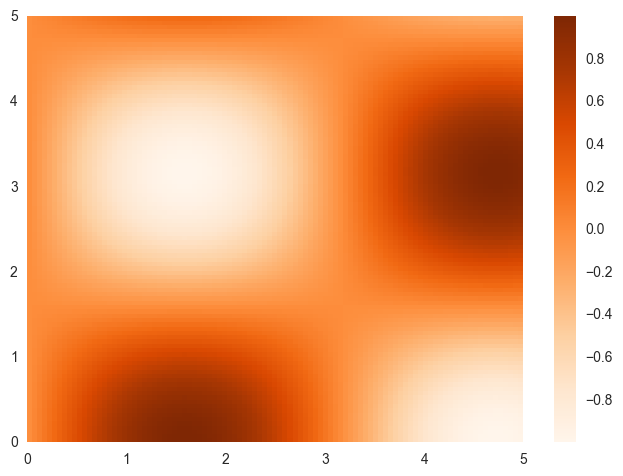

In [5]:
def fofxy(x,y):
    return math.sin(x)*math.cos(y)

def make_density_plot():
    plot_side = 100
    x = np.linspace(0, 5, plot_side)
    y = np.linspace(0, 5, plot_side)
    X, Y = np.meshgrid(x,y)
    Z = np.zeros((plot_side,plot_side))
    for i in range(plot_side):
        for j in range(plot_side):
            Z[i,j] = fofxy(X[i,j],Y[i,j])
    plt.pcolor(x, y, Z, cmap=cm.Oranges)
    plt.colorbar()
    plt.show()
    
make_density_plot()

In [6]:
def get_single_likelihood(x, y, slope, intercept):
    a = slope
    b = -1
    c = intercept
    if (a==0):
        distance = abs(y-c)
    else:
        distance = abs((a*x)+(b*y)+c)/math.sqrt((a*a)+(b*b))
    de = math.exp(20*-(distance**2))
    return de

min,max= 0.0907179532894 0.999939397306


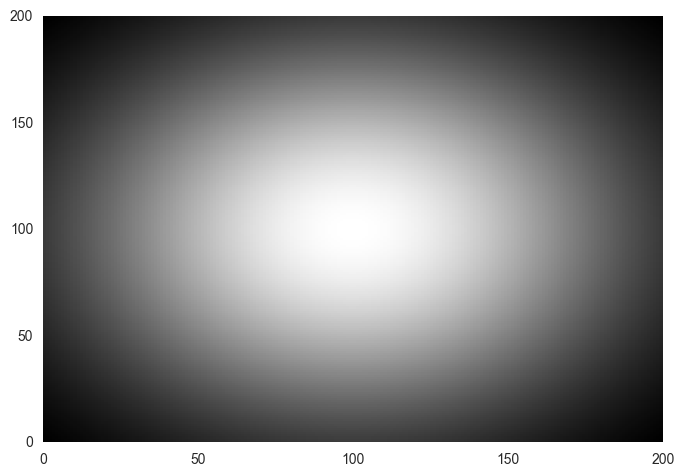

In [7]:
def make_gaussian_prior(spread):
    x_range = np.linspace(-1, 1, Plot_side)
    y_range = np.linspace(-1, 1, Plot_side)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros((Plot_side, Plot_side))
    for i in range(Plot_side):
        for j in range(Plot_side):
            dist = math.sqrt((X[i,j]*X[i,j])+(Y[i,j]*Y[i,j]))
            Z[i,j] = math.exp(spread*(dist**2))
    return Z

Z = make_gaussian_prior(-1.2)
print("min,max=",np.min(Z),np.max(Z))
x_range = np.linspace(-2, 2, Plot_side)
y_range = np.linspace(-2, 2, Plot_side)
#plt.pcolor(x_range, y_range, Z, cmap=Cmap)
plt.pcolor(Z, cmap=Cmap)
plt.show()

In [8]:
def make_plot_axes_ticks_square_1(show_axes=True, do_ticks=True, 
                                  limited_ticks=True, set_limits=True, 
                                  set_square=True):
    ax = plt.gca()
    if do_ticks and limited_ticks:
        plt.xticks([-1, 0, 1], ['-1','0','1'])
        plt.yticks([-1, 0, 1], ['-1','0', '1'])
    if not do_ticks:
        ax.set_xticks([]) 
        ax.set_yticks([]) 
    if set_limits:
        plt.xlim(-1,1)
        plt.ylim(-1,1)
    if set_square:
        ax.set_aspect('equal')

In [9]:
def make_plot_axes_ticks_square_2(show_axes=True, do_ticks=True, limited_ticks=True, set_limits=True, set_square=True):
    ax = plt.gca()
    if do_ticks or limited_ticks:
        plt.xticks([-2, -1, 0, 1, 2], ['-2', '-1','0','1', '2'])
        plt.yticks([-2, -1, 0, 1, 2], ['-2', '-1','0', '1', '2'])
    if not do_ticks:
        ax.set_xticks([]) 
        ax.set_yticks([]) 
    if set_limits:
        plt.xlim(-2,2)
        plt.ylim(-2,2)
    if set_square:
        ax.set_aspect('equal')

In [10]:
def make_plot_axes_ticks_square_grid(show_axes=True, do_ticks=True, 
                                  limited_ticks=True, set_limits=True, 
                                  set_square=True, extent=2):
    ax = plt.gca()
    if do_ticks and limited_ticks:
        extent_floor = math.floor(extent)
        tick_locations = np.linspace(-extent_floor, extent_floor, 1+(2*extent_floor))
        plt.xticks(tick_locations, tick_locations)
        plt.yticks(tick_locations, tick_locations)
    if not do_ticks:
        ax.set_xticks([]) 
        ax.set_yticks([]) 
    if set_limits:
        plt.xlim(-extent,extent)
        plt.ylim(-extent,extent)
    if set_square:
        ax.set_aspect('equal')

In [11]:
def show_dot_likelihood(x, y, show_colorbar=False, show_plot=True):
    x_range = np.linspace(-2, 2, Plot_side)
    y_range = np.linspace(-2, 2, Plot_side)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros((Plot_side, Plot_side))
    for i in range(Plot_side):
        for j in range(Plot_side):
            Z[i,j] = get_single_likelihood(x, y, X[i,j],Y[i,j])
    if show_plot:
        plt.pcolor(x_range, y_range, Z, cmap=Cmap)
    if show_colorbar:
        plt.colorbar()
    return Z

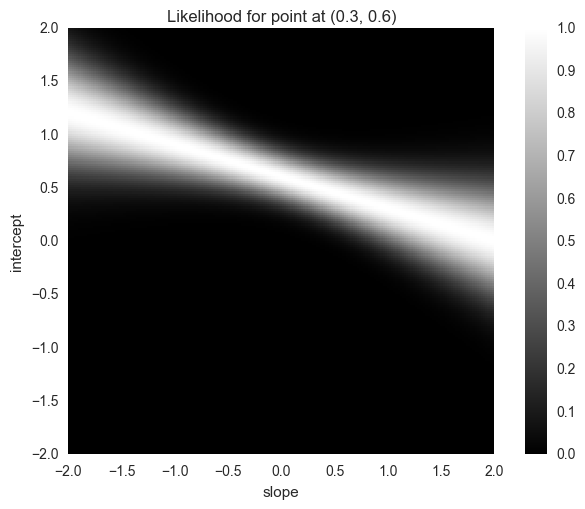

In [12]:
def draw_likelihood_for_point_figure(x, y):
    Z = show_dot_likelihood(x, y, True)
    make_plot_axes_ticks_square_grid(show_axes=False, limited_ticks=False)
    plt.xlabel('slope')
    plt.ylabel('intercept')
    plt.title('Likelihood for point at ('+str(x)+', '+str(y)+')')
    file_helper.save_figure('likelihood-for-point')
    plt.show()
draw_likelihood_for_point_figure(.3,.6)

In [13]:
def plot_line(m, b, color='red', zorder=20, alpha=1, style='-', extent=1, linewidth=2):
    if abs(m) < 1e-2:
        tlist = [-extent, -extent, extent, extent]
    else:
        tlist = [-extent, extent, (extent-b)/m, (-(extent+b)/m)]
    tlist = sorted(tlist)
    (t0, t1) = tlist[1:3]
    plt.plot([t0, t1],[b+(t0*m),b+(t1*m)], linewidth=linewidth, color=color, zorder=zorder, ls=style, alpha=alpha)

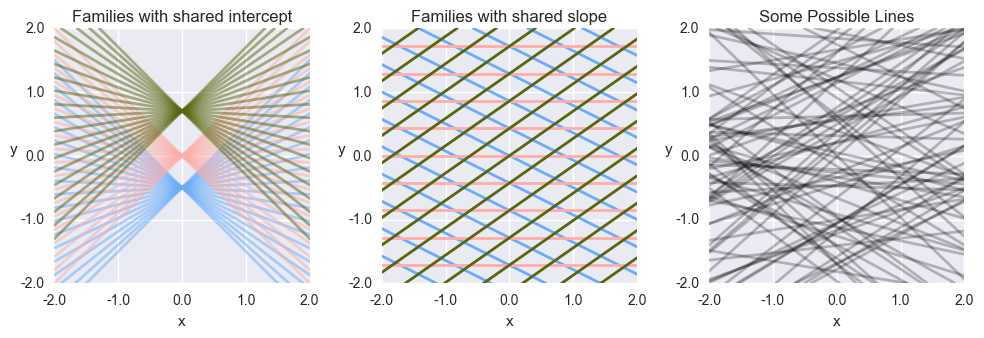

In [14]:
def make_bow_tie_figure():
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    color1 = '#69ADFA'
    color2 = '#FFADA6'
    color3 = '#59660E'
    b_color_list = [[-.5, color1], [0, color2], [.7, color3]]
    for i in range(len(b_color_list)):
        bc = b_color_list[i]
        ls = ['-', '--', ':'][i]
        for m in np.linspace(-1, 1, 20):
            plot_line(m, bc[0], color=bc[1], alpha=0.5, extent=2)
    make_plot_axes_ticks_square_grid()
    plt.xlabel("x")
    plt.ylabel("y", rotation=0)
    plt.title("Families with shared intercept")
    plt.subplot(1,3,2)
    
   
    m_color_list = [[-.5, color1], [0, color2], [.7, color3]]
    for i in range(len(m_color_list)):
        mc = m_color_list[i]
        ls = ['-', '--', ':'][i]
        for b in np.linspace(-3, 3, 15):
            plot_line(mc[0], b, color=mc[1], alpha=1, extent=2)
    make_plot_axes_ticks_square_grid()
    plt.xlabel("x")
    plt.ylabel("y", rotation=0)
    plt.title("Families with shared slope")
    plt.subplot(1,3,3)
    for i in range(80):
        m = np.random.uniform(-1, 1)
        b = np.random.uniform(-2, 2)
        plot_line(m, b, 'black', alpha=0.25, extent=2)
    make_plot_axes_ticks_square_grid(show_axes=True)
    plt.xlabel('x')
    plt.ylabel("y", rotation=0)
    plt.title('Some Possible Lines')
    plt.tight_layout()
    file_helper.save_figure('line-families')
    plt.show()
make_bow_tie_figure()

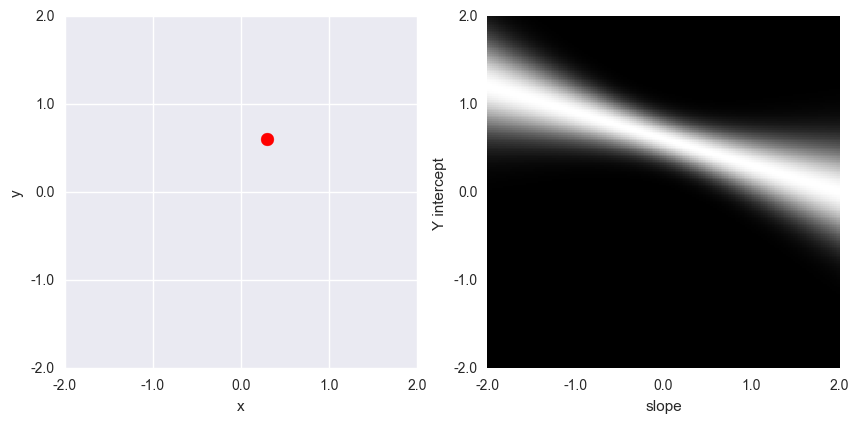

In [15]:
def make_point_and_probability_figure(x,y):
    plt.figure(figsize=(10,16))
    plt.subplot(1,2,1)
    plt.scatter([x],[y],color='red', s=85)
    make_plot_axes_ticks_square_grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(1,2,2)
    Z = show_dot_likelihood(x,y)    
    plt.xlabel('slope')
    plt.ylabel('Y intercept')
    make_plot_axes_ticks_square_grid(show_axes=False)
    file_helper.save_figure('point-and-probability')
    plt.show()
make_point_and_probability_figure(x=.3, y=.6)

In [16]:
def pick_point_from_grid(grid):
    gmin = np.min(grid)
    gmax = np.max(grid)
    attempts = 0
    while attempts < 10000: # prevent endless searching
        y = np.random.randint(0, Plot_side)
        x = np.random.randint(0, Plot_side)
        if grid[y][x] > 0:
            v = np.random.uniform(gmin, gmax)
            if v < grid[y][x]:
                x = -1 + (2*(x/Plot_side))
                y = -1 + (2*(y/Plot_side))
                return (x*2,y*2)
        attempts += 1

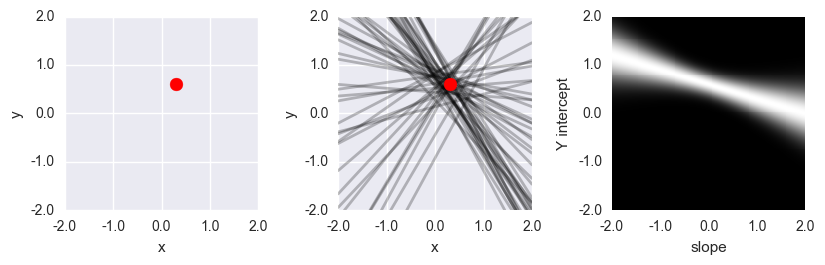

In [17]:
def make_point_and_lines_and_probability_figure(x,y):
    Z = show_dot_likelihood(x, y, show_plot=False)    

    plt.figure(figsize=(10,2.5))
    plt.subplot(1,3,1)
    plt.scatter([x],[y],color='red', s=85)
    make_plot_axes_ticks_square_grid()
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.subplot(1,3,2)
    for i in range(50):
        (m,b) = pick_point_from_grid(Z)
        plot_line(m, b, color='black', zorder=20, alpha=.25, extent=2)
    plt.scatter([x],[y],color='red', s=85, zorder=30)
    make_plot_axes_ticks_square_grid()
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.subplot(1,3,3)
    plt.pcolor(x_range, y_range, Z, cmap=Cmap)
    plt.xlabel('slope')
    plt.ylabel('Y intercept')
    make_plot_axes_ticks_square_grid(show_axes=False)
    file_helper.save_figure('point-and-lines-and-probability')
    plt.show()
make_point_and_lines_and_probability_figure(x=.3, y=.6)

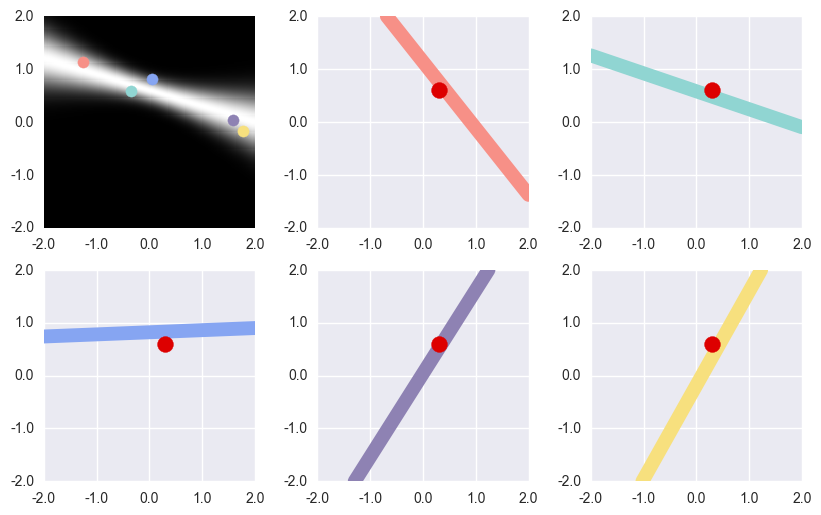

In [18]:
def make_probability_and_lines_figure(x, y):
    np.random.seed(42)
    plt.figure(figsize=(10,6))
    plt.subplot(2,3,1)
    Z = show_dot_likelihood(x,y)   
    clrs = ['#8E82B3', '#F79087', '#90D5D2', '#86A5F2', '#F7E07E']
    demo_pts = []
    (m,b) = pick_point_from_grid(Z)
    demo_pts.append([m, b, clrs[0]])
    (m,b) = pick_point_from_grid(Z)
    demo_pts.append([m, b, clrs[1]])
    (m,b) = pick_point_from_grid(Z)
    demo_pts.append([m, b, clrs[2]])
    (m,b) = pick_point_from_grid(Z)
    demo_pts.append([m, b, clrs[3]])
    (m,b) = pick_point_from_grid(Z)
    demo_pts.append([m, b, clrs[4]])
    demo_pts = sorted(demo_pts, key=lambda dp_m: dp_m[0])
    
    for dp in demo_pts:
        plt.scatter([dp[0]],[dp[1]],color=dp[2], s=65)
    make_plot_axes_ticks_square_grid(show_axes=False)
    for d in range(len(demo_pts)):
        plt.subplot(2, 3, 2+d)
        plot_line(demo_pts[d][0], demo_pts[d][1], color=demo_pts[d][2], zorder=10, linewidth=10, extent=2)
        plt.scatter([x],[y],color='#dd0000',s=[130], zorder=20)
        make_plot_axes_ticks_square_grid()
    file_helper.save_figure('probability-and-lines')
    plt.show()

make_probability_and_lines_figure(x=.3, y=.6)

In [19]:
def make_overlaid_lines(grid, num_lines):
    demo_pts = []
    for i in range(num_lines):
        (x,y) = pick_point_from_grid(grid)
        demo_pts.append([x, y])
    for d in range(len(demo_pts)):
        plot_line(demo_pts[d][0], demo_pts[d][1], color='black', zorder=10, extent=2, alpha=.2)
    make_plot_axes_ticks_square_grid(show_axes=False, do_ticks=False, limited_ticks=False, set_limits=False)

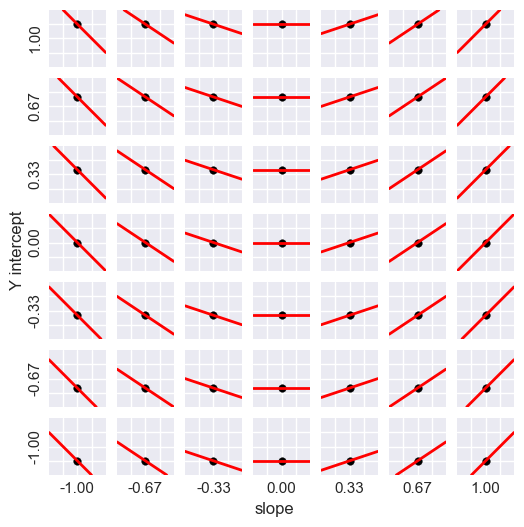

In [20]:
def make_lines_grid_figure(gridside):
    mvals = np.linspace(-1, 1, gridside)
    bvals = np.linspace(1, -1, gridside)
    plt_index = 1    
    #plt.figure(figsize=(8, 8))
    fig, ax = plt.subplots(nrows=gridside, ncols=gridside, sharex=True, sharey=True, figsize=(6, 6))
    for b in bvals:
        for m in mvals:
            plt.subplot(gridside, gridside, plt_index)
            plot_line(m, b, color='red', extent=2)
            make_plot_axes_ticks_square_grid(do_ticks=False)
            for q in [-1, 0, 1]:
                plt.plot([-2, 2], [q, q], color='#ffffff', lw=1, zorder=-5)
                plt.plot([q, q], [-2, 2], color='#ffffff', lw=1, zorder=-5)
            plt.scatter([0], [b], s=30, color='black')
            if m == -1:
                plt.ylabel('{:.2f}'.format(b))
            if (b == -1):
                plt.xlabel('{:.2f}'.format(m))
            plt_index += 1
    
    fig.text(0.5, 0.06, 'slope', ha='center')       
    fig.text(0.06, 0.5, 'Y intercept', va='center', rotation='vertical') 
    file_helper.save_figure('lines-grid')
    plt.show()
make_lines_grid_figure(7)

In [21]:
def make_base_curve(num_pts, noise_scale):
    base_curve = [2*(-.6+(.1 * ((x*10) + (2 * math.sin(1.5*x*10))))) for x in np.linspace(0, 1, num_pts)]
    noisy_curve = [cp + (np.random.randn() * noise_scale) for cp in base_curve]
    return (np.array(base_curve), np.array(noisy_curve))

In [22]:
# These are used later as globals
# They should really be locals, but this works, and that's what important right now.
(Base_curve, Noisy_curve) = make_base_curve(Num_base_points, Noise_scale)

In [23]:
def show_noisy_curve(color='#bbbbbb', zorder=10):
    xvals = np.linspace(-2, 2, Num_base_points)
    plt.plot(xvals, Noisy_curve, color=color, zorder=zorder)
    make_plot_axes_ticks_square_grid(do_ticks=False)

In [24]:
def show_noisy_curve_and_scatter(scatter_points):
    clrs = ['#D69D4A', '#C254CF', '#58AB45', '#8163D9', '#4DB3BD']
    show_noisy_curve()
    for sp_num in range(len(scatter_points)):
        color = '#888888'
        if sp_num == len(scatter_points)-1:
            color = 'red'
        sp = scatter_points[sp_num]
        plt.scatter(sp[0], sp[1], color=color, s=[85], zorder=20)

In [25]:
def multiply_grids(grid1, grid2):
    grid3 = np.zeros(grid1.shape)
    for i in range(grid1.shape[0]):
        for j in range(grid1.shape[1]):
            grid3[i][j] = grid1[i][j] * grid2[i][j]
    # normalize
    return grid3

In [26]:
def plot_grid(grid):
    x_range = np.linspace(-2, 2, Plot_side)
    y_range = np.linspace(-2, 2, Plot_side)
    plt.pcolor(x_range, y_range, grid, cmap=Cmap)

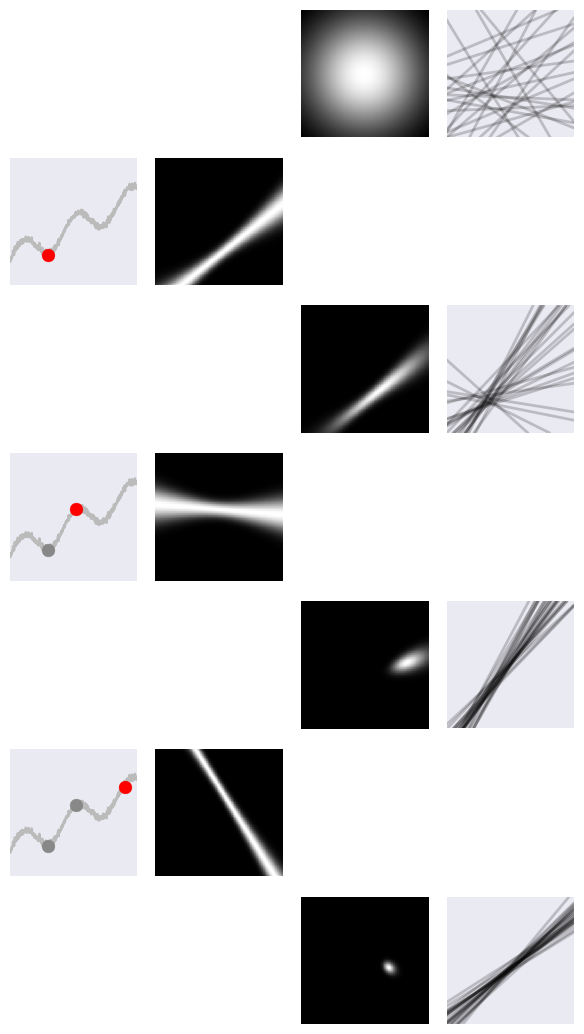

In [27]:
def make_bayes_fit_grid_figure():
    demo_lines = 25
    fit_points = []
    np.random.seed(16)


    # row 1
    plt.figure(figsize=(6,12))
    plt.subplot(8,4,3)
    prior = make_gaussian_prior(-1.2)
    
    # random prior
    # prior = np.random.uniform(.95, 1, size=(Plot_side, Plot_side))
    
    plt.pcolor(prior, cmap=Cmap)    
    make_plot_axes_ticks_square_grid(show_axes=False, do_ticks=False, limited_ticks=False, set_limits=False)
    
    plt.subplot(8,4,4)
    make_overlaid_lines(prior, demo_lines)
    make_plot_axes_ticks_square_grid(show_axes=False, do_ticks=False, limited_ticks=False, set_limits=False)

    # row 2
    fit_index = 150
    fit_points.append([(((fit_index/Num_base_points)*2)-1)*2, Noisy_curve[fit_index]])
    plt.subplot(8,4,5)
    show_noisy_curve_and_scatter(fit_points)
    make_plot_axes_ticks_square_grid(do_ticks=False, limited_ticks=False)
    
    plt.subplot(8,4,6)
    likelihood = show_dot_likelihood(fit_points[-1][0], fit_points[-1][1])
    make_plot_axes_ticks_square_grid(show_axes=False, do_ticks=False, limited_ticks=False)
    
    # row 3
    posterior = multiply_grids(likelihood, prior)    
    prior = np.copy(posterior)

    plt.subplot(8,4,11)
    plot_grid(posterior)
    make_plot_axes_ticks_square_grid(show_axes=False, do_ticks=False, limited_ticks=False)
    
    plt.subplot(8,4,12)
    make_overlaid_lines(prior, demo_lines)
    make_plot_axes_ticks_square_grid(show_axes=False, do_ticks=False, limited_ticks=False, set_limits=False)
    

    # row 4
    fit_index = 260
    fit_points.append([(((fit_index/Num_base_points)*2)-1)*2, Noisy_curve[fit_index]])
    
    plt.subplot(8,4,13)
    show_noisy_curve_and_scatter(fit_points)
    make_plot_axes_ticks_square_grid(do_ticks=False, limited_ticks=False)
    
    plt.subplot(8,4,14)
    likelihood = show_dot_likelihood(fit_points[-1][0], fit_points[-1][1])
    make_plot_axes_ticks_square_grid(show_axes=False, do_ticks=False, limited_ticks=False)
    
    # row 5
    posterior = multiply_grids(likelihood, prior)    
    prior = np.copy(posterior)
    
    plt.subplot(8,4,19)
    plot_grid(prior)
    make_plot_axes_ticks_square_grid(show_axes=False, do_ticks=False, limited_ticks=False)
    
    plt.subplot(8,4,20)
    make_overlaid_lines(prior, demo_lines)
    make_plot_axes_ticks_square_grid(show_axes=False, do_ticks=False, limited_ticks=False, set_limits=False)
    

    # row 6
    fit_index = 450
    fit_points.append([(((fit_index/Num_base_points)*2)-1)*2, Noisy_curve[fit_index]])
    
    plt.subplot(8,4,21)
    show_noisy_curve_and_scatter(fit_points)
    make_plot_axes_ticks_square_grid(do_ticks=False, limited_ticks=False)
    
    plt.subplot(8,4,22)
    likelihood = show_dot_likelihood(fit_points[-1][0], fit_points[-1][1])
    make_plot_axes_ticks_square_grid(show_axes=False, do_ticks=False, limited_ticks=False)
    
    # row 7
    posterior = multiply_grids(likelihood, prior)
    prior = np.copy(posterior)
    
    plt.subplot(8,4,27)
    plot_grid(prior)
    make_plot_axes_ticks_square_grid(show_axes=False, do_ticks=False, limited_ticks=False)
    
    plt.subplot(8,4,28)
    make_overlaid_lines(prior, demo_lines)
    make_plot_axes_ticks_square_grid(show_axes=False, do_ticks=False, limited_ticks=False, set_limits=False)
    
    plt.tight_layout()
    file_helper.save_figure('bayes-line-fit')

    plt.show()
make_bayes_fit_grid_figure()

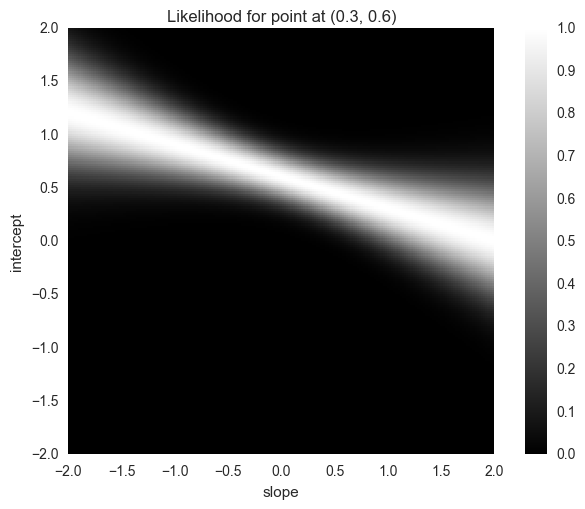

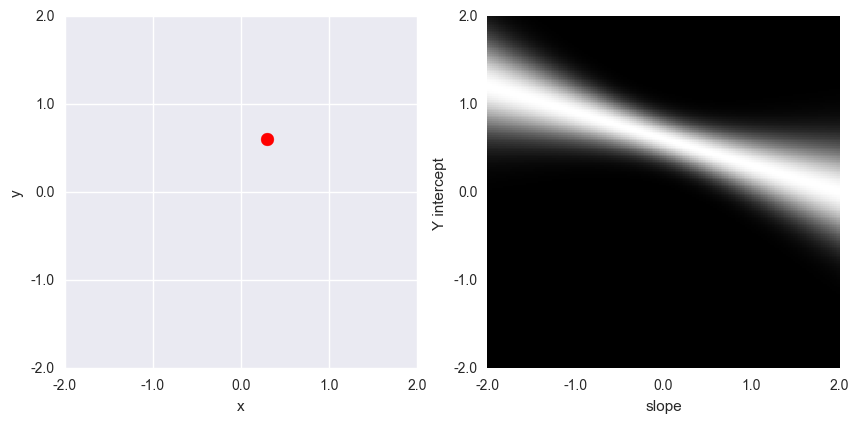

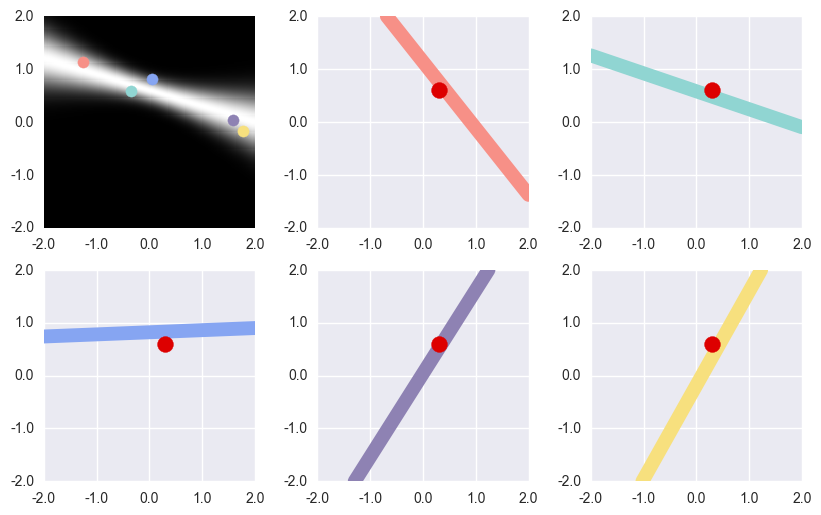

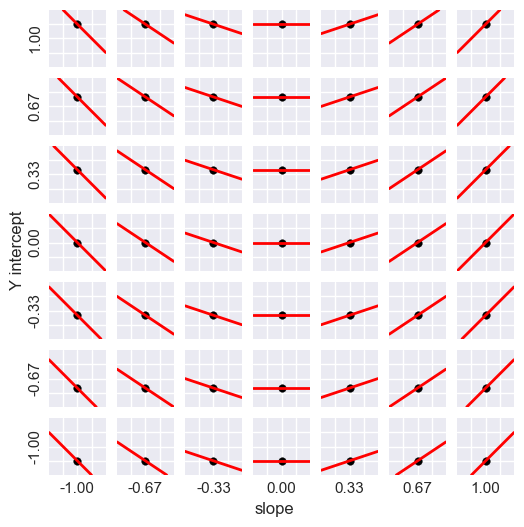

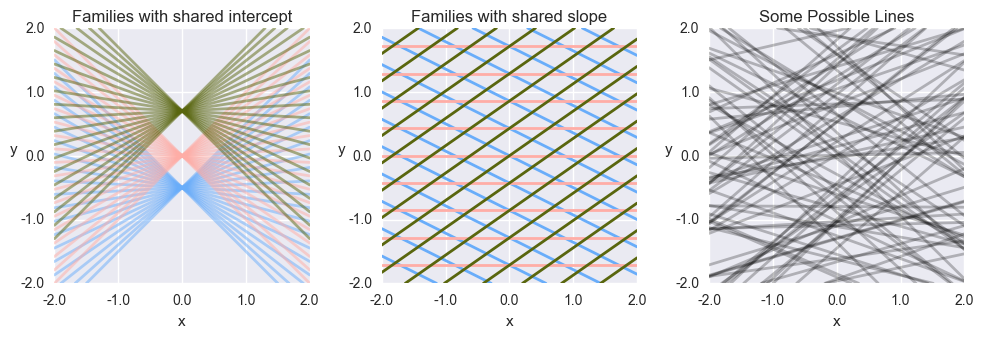

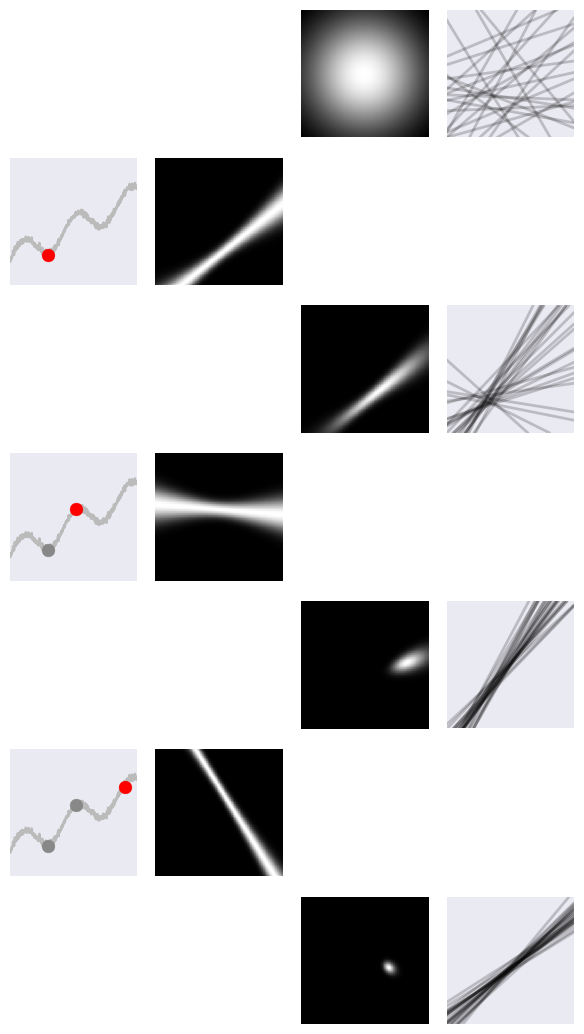

In [28]:
draw_likelihood_for_point_figure(x=.3, y=.6)
make_point_and_probability_figure(x=.3, y=.6)
make_probability_and_lines_figure(x=.3, y=.6)
make_lines_grid_figure(7)
make_bow_tie_figure()
make_bayes_fit_grid_figure()